## Introduction:

This demo is derived from http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

A decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems.
It works for both categorical and continuous input and output variables.
Types of Decision Trees
* Categorical Variable Decision Tree
* Continuous Variable Decision Tree

In this notebook we are going to learn how to build a decision tree classifier using scikit-learn, train it and then use it to predict the target variable.


## Goal:
To build a decision tree classifier in python using scikit-learn for balance scale dataset and then use the trained model to predict whether the balance scale tip to the right or tip to the left or be balanced.

## Dataset: 
We will be using the Balance Scale Dataset which can be found here -> https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data

Dataset description:
Balance Scale data set consists of 5 attributes, 4 as feature attributes and 1 as the target attribute. We will be building a classifier for predicting the Class attribute. 

| Variable Name  | Variable Values |
| :-----------: | :-----------: |
| Class Name(Target Variable)   |  “R” : balance scale tip to the right |
|                               |  “L” : balance scale tip to the left|
|                                | “B” : balance scale be balanced|
|Left-Weight    |  1, 2, 3, 4, 5       |
|Left-Distance    |  1, 2, 3, 4, 5       |
|Right-Weight |  1, 2, 3, 4, 5       |
|Right-Distance | 1, 2, 3, 4, 5       |
 

In [0]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz


In [0]:
# Reading Data
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

In [0]:
# Analyzing data
print("Number of Samples:: ", balance_data.shape[0])
print("Number of features: ", balance_data.shape[1])

Number of Samples::  625
Number of features:  5


In [0]:
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [0]:
# The target variable is marked as a class in the balance_data frame. The values are present in string format. 
# However, the algorithm requires the variables to be coded into its equivalent integer codes.
# We can convert the string categorical values into an integer code using factorize method of the pandas library.
feature_names = balance_data.columns[1:]
balance_data[0],class_names = pd.factorize(balance_data[0])

In [0]:
balance_data.head()

,0,1,2,3,4
0,0,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5


In [0]:
# Data Slicing
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

### Splitting the data into train and test sets
Let’s split our data into training and test set. We will use sklearn’s train_test_split() method. 
The snippet below will split data into training and test set. X_train, y_train are training data &  X_test, y_test belongs to the test dataset.

The parameter test_size is given value 0.3; it means test sets will be 30% of whole dataset  & training dataset’s size will be 70% of the entire dataset. random_state variable is a pseudo-random number generator state used for random sampling. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

### Decision Tree Training
* Let’s build our decision tree classifiers using Gini index & Entropy as criterion. 

In [0]:
# Decision Tree classifier with criteria - Gini Index
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=3, min_samples_leaf=5)
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [0]:
# Decision Tree classifier with criteria - Entropy
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=3, min_samples_leaf=5)
tree_entropy.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

### Visualising the Decision Graph

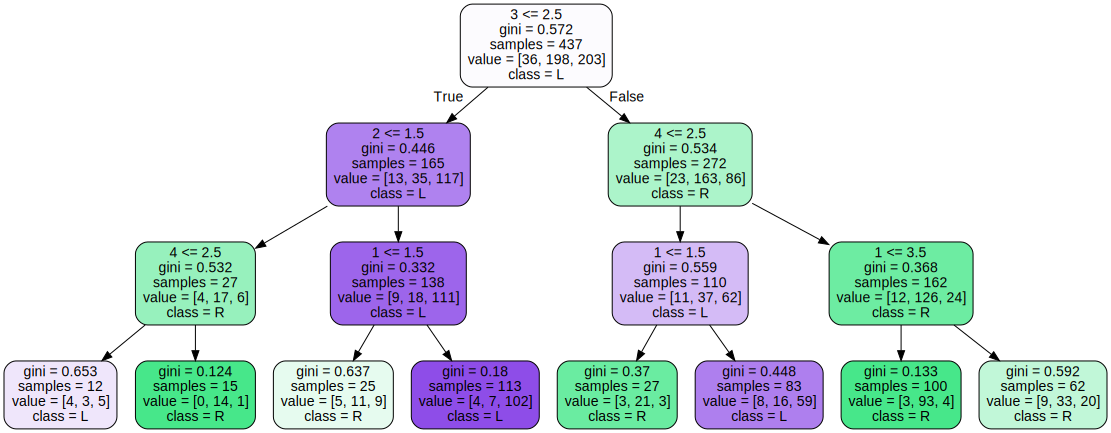

In [0]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

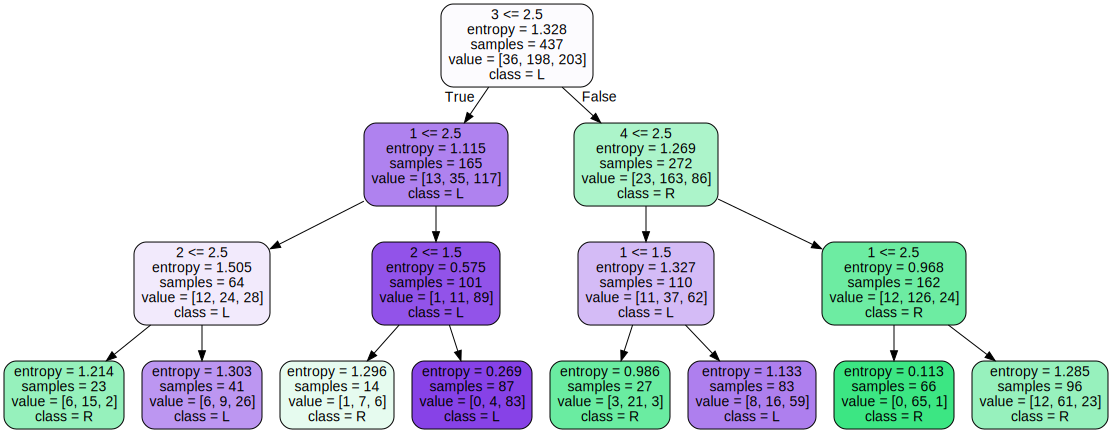

In [0]:
# Visualizing the Entropy based Decision Tree
graph_data = tree.export_graphviz(tree_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

### Prediction

In this step, we will use our two modeled classifiers, one classifier with gini index and another one with entropy as the criterion to predict the classes for our test data set. We can use predict() method for this.

In [0]:
# Prediction for Decision Tree classifier with criterion as gini index
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1])

In [0]:
# Prediction for Decision Tree classifier with criterion as Entropy
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1])

### Calculating Accuracy Score

The function accuracy_score() is used to print accuracy of a Decision Tree classifier. Accuracy is the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.
* y_true
* y_pred
* normalize
* sample_weight

Out of these 4, normalize & sample_weight are optional parameters. The parameter y_true  accepts an array of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value.

In [0]:
# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini)*100)


Accuracy for Decision Tree with criteria as Gini Index is:  73.40425531914893


In [0]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Accuracy for Decision Tree with criteria as Entropy is: ", accuracy_score(y_test,y_pred_entropy)*100)


Accuracy for Decision Tree with criteria as Entropy is:  70.74468085106383
